# Exercise 1

**Step 1:** Use pandas read_csv function to load the file into a data frame object named data and display the first 5 records/rows of the data frame.

In [1]:
import pandas as pd

data = pd.read_csv('Baltimore_crime_data.csv') # load data file using pandas 

data.head()    # display the first 5 records/rows of the dataframe object

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,11/04/2017,23:39:00,4E,5700 HAZELWOOD CIR,COMMON ASSAULT,I,HANDS,444.0,NORTHEASTERN,Frankford,-76.53114,39.33952,"(39.3395200000, -76.5311400000)",APT/CONDO,1
1,11/04/2017,23:16:00,4E,200 N MOUNT ST,COMMON ASSAULT,I,HANDS,711.0,WESTERN,Franklin Square,-76.64393,39.29141,"(39.2914100000, -76.6439300000)",APT/CONDO,1
2,11/04/2017,23:15:00,6C,1100 E NORTH AVE,LARCENY,I,NaN,342.0,EASTERN,East Baltimore Midway,-76.60333,39.31177,"(39.3117700000, -76.6033300000)",GROCERY/CO,1
3,11/04/2017,23:15:00,7A,4800 ERDMAN AVE,AUTO THEFT,O,NaN,433.0,NORTHEASTERN,Armistead Gardens,-76.55972,39.30727,"(39.3072700000, -76.5597200000)",STREET,1
4,11/04/2017,23:00:00,4E,6400 ELRAY DR,COMMON ASSAULT,NaN,HANDS,632.0,NORTHWESTERN,Cheswolde,-76.69162,39.36942,"(39.3694200000, -76.6916200000)",NaN,1


**Step 2:** Create a pandas DataFrame object named *counts* that contains the number of auto thefts, assaults, robberies, and homicides for each district. **Hint:** You can use value_counts() function to do this.

In [2]:
from pandas import DataFrame

# Write your Python code here to generate the counts DataFrame object from the data object
auto_theft = data[data["Description"]=="AUTO THEFT"]
auto_counts = DataFrame(auto_theft["District"].value_counts().sort_index())

assault = data[data["Description"]=="COMMON ASSAULT"]
assault_counts = DataFrame(assault["District"].value_counts().sort_index())

robbery = data[data["Description"]=="ROBBERY - STREET"]
robbery_counts = DataFrame(robbery["District"].value_counts().sort_index())

homicide = data[data["Description"]=="HOMICIDE"]
homicide_counts = DataFrame(homicide["District"].value_counts().sort_index())

counts = pd.concat([auto_counts,assault_counts,robbery_counts,homicide_counts], axis=1)
counts.columns = ['Auto Theft', 'Assault', 'Robbery', 'Homicide']

# Display the counts object at the end
counts

,Auto Theft,Assault,Robbery,Homicide
CENTRAL,1797,5387,2696,112
EASTERN,1914,5303,1408,242
NORTHEASTERN,5155,7077,2881,217
NORTHERN,2826,4229,2154,119
NORTHWESTERN,3635,4234,1809,223
SOUTHEASTERN,2737,6376,3002,99
SOUTHERN,3140,5388,1916,136
SOUTHWESTERN,3476,4483,1373,212
WESTERN,2912,4520,1227,264


**Step 3:** Draw a bar chart that shows the total number of crimes associated with each crime description.

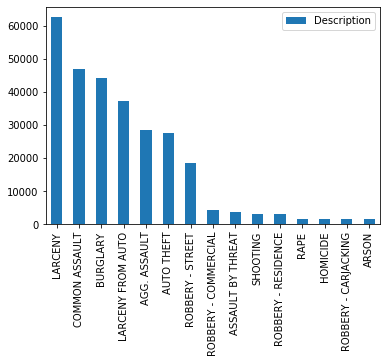

In [3]:
counts = DataFrame(data["Description"].value_counts())

import matplotlib
%matplotlib inline

counts.plot(kind='bar')   # Plot the number of crimes for each crime description

**Step 4:** Write a function named GetYear() that contains a regular expression to parse the CrimeDate column of the data frame and returns the year of the crime. Append the Year as a new column in the data frame (see the solution below).   

In [4]:
import re

def getYear(CrimeDate):
    
    regex = r'/'          # fill in the pattern
    fields = re.split(regex, CrimeDate)
    return fields[2]    # fill in the field index to return the year     

data['Year'] = data['CrimeDate'].apply(getYear)    # this will apply getYear function to the CrimeDate column
data[['CrimeDate','Year']].head()

,CrimeDate,Year
0,11/04/2017,2017
1,11/04/2017,2017
2,11/04/2017,2017
3,11/04/2017,2017
4,11/04/2017,2017
